# Pumkin seeds analysis


In [1]:
import pandas as pd
import numpy as np
import os
print(os.getcwd())
print(os.listdir())


/content
['.config', 'drive', 'model.pkl', 'sample_data']


In [16]:
from google.colab import drive
drive.mount('/content/drive')   
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Project/flask/Pumpkin_Seeds_Dataset.xlsx")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [4]:
df.shape

(2500, 13)

In [5]:
df.isnull().sum()

,0
Area,0
Perimeter,0
Major_Axis_Length,0
Minor_Axis_Length,0
Convex_Area,0
Equiv_Diameter,0
Eccentricity,0
Solidity,0
Extent,0
Roundness,0


<Axes: xlabel='Class', ylabel='Area'>

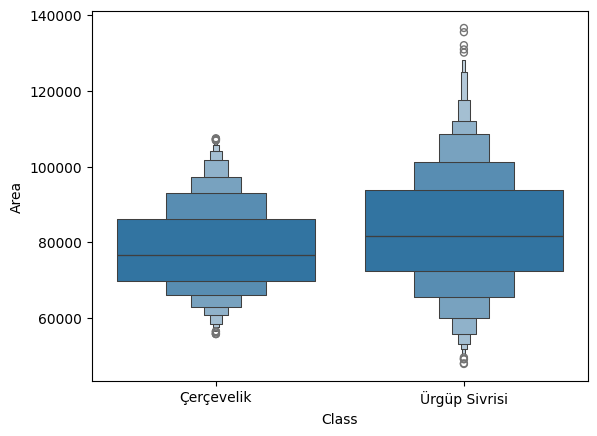

In [6]:
import seaborn as sns
sns.boxenplot(x = df["Class"], y = df["Area"], data = df)

In [17]:
Q1 = df["Area"].quantile(0.25)
Q3 = df["Area"].quantile(0.75)
# Q1, Q3

# calculate the interquartile range (IQR)
IQR = Q3 - Q1
# IQR

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

#filter the data to remove outliers
filtered_data = df[(df["Area"] >= lower_bound) & (df["Area"] <= upper_bound)]
filtered_data


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


<Axes: xlabel='Area'>

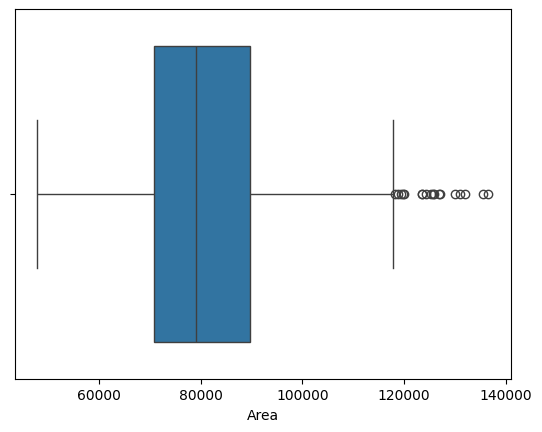

In [8]:
sns.boxplot(x = df["Area"])

In [9]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ["Area", "Perimeter", "Major_Axis_Length"]

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled DataFrame
print(df)



          Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     0.094060   0.028593           0.015551           220.2388        56831   
1     0.323710   0.288960           0.282492           234.2289        77280   
2     0.267208   0.310438           0.337143           211.0457        72663   
3     0.208936   0.178831           0.178027           222.5322        67118   
4     0.204975   0.187652           0.184843           220.4545        67117   
...        ...        ...                ...                ...          ...   
2495  0.357624   0.515547           0.622479           190.4367        80381   
2496  0.244915   0.312365           0.416625           191.8210        70216   
2497  0.451910   0.494712           0.546449           222.1872        88702   
2498  0.361844   0.455106           0.530869           204.7531        80902   
2499  0.417386   0.421798           0.416489           234.5597        85781   

      Equiv_Diameter  Eccentricity  Sol

In [10]:
df = df.drop(columns=['Convex_Area', 'Equiv_Diameter','Eccentricity','Minor_Axis_Length'])
df.head()

,Area,Perimeter,Major_Axis_Length,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.094060,0.028593,0.015551,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,0.323710,0.288960,0.282492,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,0.267208,0.310438,0.337143,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,0.208936,0.178831,0.178027,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,0.204975,0.187652,0.184843,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [11]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.369146,0.378882,0.398037,0.989492,0.693205,0.791533,2.041702,0.704121
std,0.154166,0.158121,0.164882,0.003494,0.060914,0.055924,0.315997,0.053067
min,0.000000,0.000000,0.000000,0.918600,0.468000,0.554600,1.148700,0.560800
25%,0.257528,0.261004,0.275938,0.988300,0.658900,0.751900,1.801050,0.663475
50%,0.351295,0.369320,0.377205,0.990300,0.713050,0.797750,1.984200,0.707700
75%,0.471806,0.484620,0.503987,0.991500,0.740225,0.834325,2.262075,0.743500
max,1.000000,1.000000,1.000000,0.994400,0.829600,0.939600,3.144400,0.904900


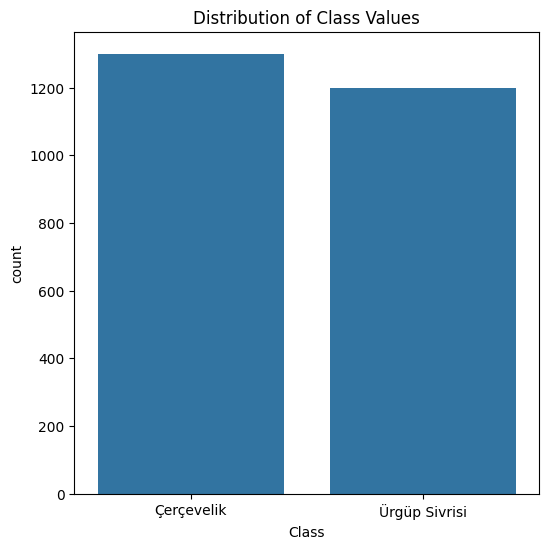

In [12]:
#counting the class values (Univariate Analysis)
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 6))
sns.countplot(data = df, x = "Class")
plt.title("Distribution of Class Values")
plt.show()


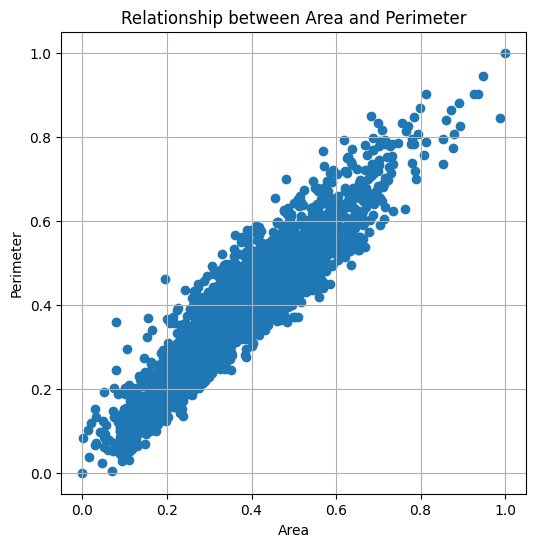

In [13]:
#(Bivariate Analysis) Relationship between Area and Perimeter
plt.figure(figsize=(6, 6))
plt.scatter(df["Area"], df["Perimeter"])
plt.title("Relationship between Area and Perimeter")
plt.xlabel("Area")
plt.ylabel("Perimeter")
plt.grid(True)
plt.show()

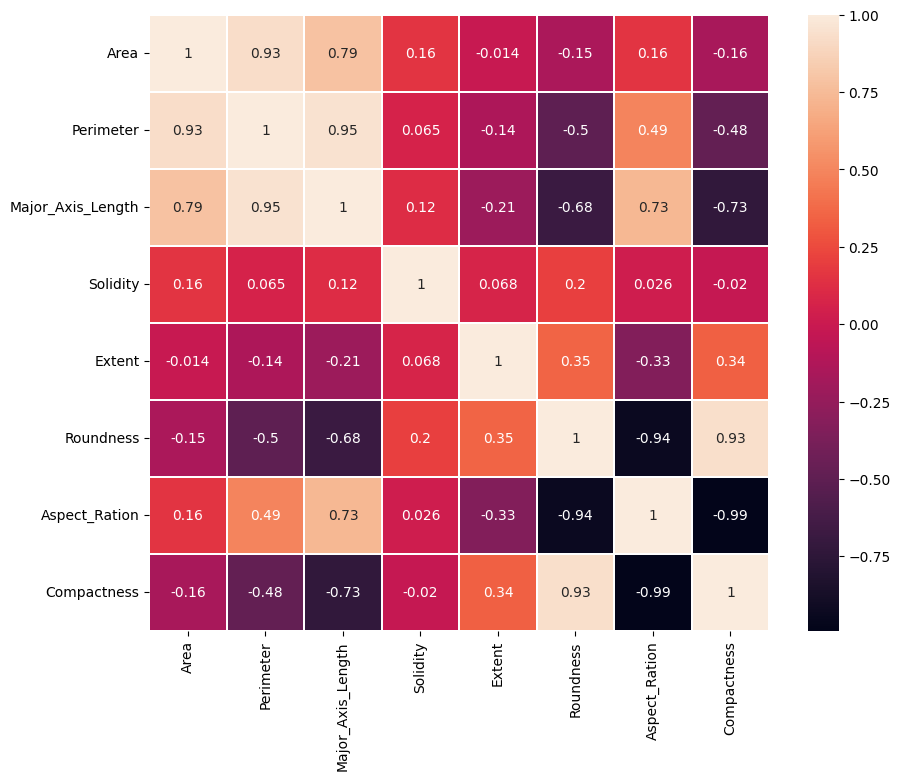

In [14]:
#(Multivariate Analysis) Correlation Heatmap
df.drop(columns=['Class'], inplace=True)
sns.heatmap(df.corr(), annot=True, linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [18]:
X = df.drop(columns=['Class'], axis=1)
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359


In [19]:
Y = df["Class"]
Y

,Class
0,Çerçevelik
1,Çerçevelik
2,Çerçevelik
3,Çerçevelik
4,Çerçevelik
...,...
2495,Ürgüp Sivrisi
2496,Ürgüp Sivrisi
2497,Ürgüp Sivrisi
2498,Ürgüp Sivrisi


In [20]:
# Splitting into dataset into training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (2000, 12)
x_test shape: (500, 12)
y_train shape: (2000,)
y_test shape: (500,)


# Logistic Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

y_pred = logistic_regression.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)

print("Accuracy of Logistic Regression:", acc_lr)
print("Classification Report for Logistic Regression:\n", c_lr)

Accuracy of Logistic Regression: 0.866
Classification Report for Logistic Regression:
                precision    recall  f1-score   support

   Çerçevelik       0.83      0.92      0.87       247
Ürgüp Sivrisi       0.91      0.81      0.86       253

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.87      0.87      0.87       500



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)

print("Accuracy of Random Forest:", acc_rf)
print("Classification Report for Random Forest:\n", c_rf)

Accuracy of Random Forest: 0.872
Classification Report for Random Forest:
                precision    recall  f1-score   support

   Çerçevelik       0.84      0.91      0.88       247
Ürgüp Sivrisi       0.91      0.83      0.87       253

     accuracy                           0.87       500
    macro avg       0.87      0.87      0.87       500
 weighted avg       0.88      0.87      0.87       500



# Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

acc_dt = accuracy_score(y_test, y_pred)
c_dt = classification_report(y_test, y_pred)

print("Accuracy of Decision Tree:", acc_dt)
print("Classification Report for Decision Tree:\n", c_dt)

Accuracy of Decision Tree: 0.81
Classification Report for Decision Tree:
                precision    recall  f1-score   support

   Çerçevelik       0.81      0.80      0.81       247
Ürgüp Sivrisi       0.81      0.82      0.81       253

     accuracy                           0.81       500
    macro avg       0.81      0.81      0.81       500
 weighted avg       0.81      0.81      0.81       500



# Multinomial Navies Bayes Model

In [24]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)

y_pred = naive_bayes.predict(x_test)

acc_nb = accuracy_score(y_test, y_pred)
c_nb = classification_report(y_test, y_pred)

print("Accuracy of Naive Bayes:", acc_nb)
print("Classification Report for Naive Bayes:\n", c_nb)

Accuracy of Naive Bayes: 0.824
Classification Report for Naive Bayes:
                precision    recall  f1-score   support

   Çerçevelik       0.78      0.89      0.83       247
Ürgüp Sivrisi       0.88      0.76      0.81       253

     accuracy                           0.82       500
    macro avg       0.83      0.82      0.82       500
 weighted avg       0.83      0.82      0.82       500



# Support Vector Machine Model

In [25]:
from sklearn.svm import SVC

support_vector_machine = SVC()
support_vector_machine.fit(x_train, y_train)

y_pred = support_vector_machine.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred)
c_svm = classification_report(y_test, y_pred)

print("Accuracy of Support Vector Machine:", acc_svm)
print("Classification Report for Support Vector Machine:\n", c_svm)

Accuracy of Support Vector Machine: 0.566
Classification Report for Support Vector Machine:
                precision    recall  f1-score   support

   Çerçevelik       0.54      0.89      0.67       247
Ürgüp Sivrisi       0.70      0.25      0.36       253

     accuracy                           0.57       500
    macro avg       0.62      0.57      0.52       500
 weighted avg       0.62      0.57      0.52       500



# Gradiant Boosting Classifier Model

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(x_train, y_train)

y_pred = gradient_boosting.predict(x_test)
acc_gb = accuracy_score(y_test, y_pred)
c_gb = classification_report(y_test, y_pred)

print("Accuracy of Gradient Boosting:", acc_gb)
print("Classification Report for Gradient Boosting:\n", c_gb)

Accuracy of Gradient Boosting: 0.872
Classification Report for Gradient Boosting:
                precision    recall  f1-score   support

   Çerçevelik       0.83      0.93      0.88       247
Ürgüp Sivrisi       0.92      0.82      0.87       253

     accuracy                           0.87       500
    macro avg       0.88      0.87      0.87       500
 weighted avg       0.88      0.87      0.87       500



In [27]:
import pandas as pd

# Create a DataFrame with the same column names as training data
prediction_data = pd.DataFrame([[0.410519, 0.340661, 0.294143, 0.9916, 0.7151, 0.8440, 1.7811, 0.7487, 0.9916, 0.7151, 0.8440, 1.7811]], 
                               columns=X.columns)

prediction = random_forest.predict(prediction_data)
prediction[0]
if prediction[0] == 0:
    print("The pumpkin seed is of class Çerçevelik ")
elif prediction[0] == 1:
    print("The pumpkin seed is of class Ürgüp Sivrisi ")



In [28]:
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Naive Bayes", "Support Vector Machine", "Gradient Boosting"]
accuracies = [acc_lr, acc_rf, acc_dt, acc_nb, acc_svm, acc_gb]

data = {"Model": models, "Accuracy": accuracies}
accuracy_df = pd.DataFrame(data)
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.866
1,Random Forest,0.872
2,Decision Tree,0.810
3,Naive Bayes,0.824
4,Support Vector Machine,0.566
5,Gradient Boosting,0.872


# Model Saving

In [29]:
import os
print(os.getcwd())
print(os.listdir())


/content
['.config', 'drive', 'model.pkl', 'sample_data']


In [37]:
import pickle
import warnings
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/Project/flask')
print(os.listdir())
# Save model to Google Drive (update the path to match your folder structure)
pickle.dump(random_forest, open('model.pkl', 'wb'))
print(os.listdir())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Pumpkin_Seeds_Dataset.xlsx', 'app.py', 'colab.ipynb', 'templates', 'model.pkl']
['Pumpkin_Seeds_Dataset.xlsx', 'app.py', 'colab.ipynb', 'templates', 'model.pkl']
